In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


#file path
file = 'DCT_withoutduplicate 5.csv'

#reading the csv file
data = pd.read_csv(file)

#checking the null values in the datasets
data.isnull().sum().sum()

0

In [25]:
#define a method to seprate features and targets variables.
def split_feature_targrt_var(data, target_variable):
    # Separate features and target variable (taking LABEL as Target variable and all other fatures variable)
    X = data.drop(columns=target_variable)
    y = data[target_variable]

    return X, y

In [36]:

def linear_regression_model_single_col(X, y, feature_col_indx):
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Using only one feature for linear regression
    X_train_one_feature = X_train.iloc[:, [feature_col_indx]]  # Taking the feature_col_indx as one futures from the data sets
    X_test_one_feature = X_test.iloc[:, [feature_col_indx]]
    
    # Train the linear regression model
    reg = LinearRegression().fit(X_train_one_feature, y_train)
    
    # doing predictions on training & test data
    y_train_pred = reg.predict(X_train_one_feature)
    y_test_pred = reg.predict(X_test_one_feature)

    return y_train, y_test, y_train_pred, y_test_pred



#initialing the target variable of the datasets
target_variable = 'LABEL'

#calling the function
X, y = split_feature_targrt_var(data, target_variable)   #function return fatures and target variable as X and y resp.

y_train, y_test, y_train_pred, y_test_pred = linear_regression_model_single_col(X, y, feature_col_indx=0)   #function return prediction of training and testing data

print(f'Prediction on Training data :\n{y_train_pred}\n')
print(f'Prediction on Testing data  :\n{y_test_pred}')
print("\n------------Training and testing completed with one feature------------\n")

Prediction on Training data :
[3373.55410308 3373.53809566 3373.55713162 ... 3373.60330984 3373.58981926
 3373.59363837]

Prediction on Testing data  :
[3373.5382652  3373.55395307 3373.54971306 3373.55181574 3373.63699244
 3373.59812155 3373.6077862  3373.56698607 3373.54920893 3373.54271235
 3373.5465454  3373.58766506 3373.54771111 3373.65203044 3373.5672687
 3373.58519644 3373.54182452 3373.59726703 3373.58012329 3373.57864337
 3373.53744211 3373.53010476 3373.5796343  3373.5574528  3373.65105762
 3373.58100617 3373.55758983 3373.54990921 3373.54621117 3373.60439947
 3373.62625994 3373.59513081 3373.60792977 3373.53367111 3373.61127055
 3373.53950673 3373.63821653 3373.54963445 3373.53747287 3373.5664775
 3373.62311076 3373.54879085 3373.55681585 3373.59921676 3373.54670408
 3373.61041196 3373.58953856 3373.58101226 3373.54673463 3373.55501522
 3373.58634096 3373.59663717 3373.61922196 3373.59715155 3373.55369603
 3373.60449139 3373.5475664  3373.54261293 3373.61904789 3373.5978980

In [35]:
#Calculate metrics for trainng and testing data
def matrix_calulate(y_train, y_test, y_train_pred, y_test_pred):
    # Calculate metrics(MSE, RMSE, MAPE and R2 scores for prediction made by the trained mode) for training data
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    # Calculate metrics(MSE, RMSE, MAPE and R2 scores for prediction made by the trained mode) for test data
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"Training\nMSE : {mse_train}\nRMSE : {rmse_train}\nMAPE : {mape_train}\nR2 : {r2_train}\n")
    print(f"Test\nMSE : {mse_test}\nRMSE : {rmse_test}\nMAPE : {mape_test}\nR2 : {r2_test}\n")





#calling the fuction
matrix_calulate(y_train, y_test, y_train_pred, y_test_pred)   
    

Training
MSE : 879.7902956038835
RMSE : 29.661259170909847
MAPE : 0.005715337994276426
R2 : 1.230034667121238e-06

Test
MSE : 841.3115172009182
RMSE : 29.00537048894425
MAPE : 0.005747368399148773
R2 : -0.0016475623755989321



/home/jaykishor_c/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jaykishor_c/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1]:
def linear_regression_model_single_col(X, y):
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Using multiple features for linear regression
    reg_multi = LinearRegression().fit(X_train, y_train)

    X_train_reduced_last_10 = X_train.iloc[:-10, :]
    
    # doing predictions on training and test data
    y_train_pred_multi = reg_multi.predict(X_train)
    y_test_pred_multi = reg_multi.predict(X_test)

    #Calculate metrics(MSE, RMSE, MAPE and R2 scores for prediction
    matrix_calulate(y_train, y_test, y_train_pred_multi, y_test_pred_multi)
    

#calling the function
linear_regression_model_single_col(X, y)   #this function calculate & display metrics(MSE, RMSE, MAPE and R2 scores for prediction on train and test data

NameError: name 'X' is not defined

In [50]:
def k_means_clustering(X_train):
    # Performing K-means clustering by excluding target variable
    kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train)
    
    # Get the cluster labels and centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    print("\nK-means clustering completed.")
    
    return labels, centers
    

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#calling the fuction
labels, centers = k_means_clustering(X_train)   #this function return cluster labels and centers

print(f"\nCluster Labels\n {labels}\n")
print(f"Cluster Centers\n {centers}\n")


K-means clustering completed.

Cluster Labels
 [1 1 1 ... 0 0 0]

Cluster Centers
 [[ 3.54006554e+04  7.08223441e+01  9.61856039e+01  2.14550905e+03
   8.10019118e+01  2.11085277e+03 -1.50539174e+02 -7.73650738e+01
  -4.39869141e+01 -1.95687560e+02 -5.82155773e+02 -1.60219679e+02
  -2.14397174e+03 -1.59722915e+02 -5.13416645e+02  1.06947553e+02
  -2.62729042e+01  8.08580479e+01  1.44864541e+02 -5.29733929e+01
   1.37809144e+02 -3.10241798e+02  9.39599125e+01  4.39523557e+02
   2.99574653e+02  3.77642903e+02  8.70858682e+01 -3.51334652e+02
  -1.39440394e+01  6.59872697e+01 -3.17672059e+01  8.08529954e+01
   1.38649617e+02 -8.22915393e+01  7.98919360e+01 -3.64447475e+01
   1.93192558e+02  9.31627155e-01  3.66294048e+02 -1.51829561e+02
   1.20302933e+02 -1.43142851e+02  4.08056868e+02  1.59438185e+01
   1.76453705e+02 -2.50337451e+01 -3.62207033e+01 -2.71356170e+01
  -1.58816016e+02 -1.57266913e+02 -1.05352326e+02 -1.92426357e+02
   7.97209722e+00 -4.34430825e+01 -1.19154532e+01  4.80719

In [51]:
def Clustering_Scores(X_train, labels):
    # Calculating clustering scores
    sil_score = silhouette_score(X_train, labels)
    ch_score = calinski_harabasz_score(X_train, labels)
    db_score = davies_bouldin_score(X_train, labels)
    
    print(f"Clustering score\n[Silhouette Score : {sil_score}\nCalinski-Harabasz Score : {ch_score}\nDavies-Bouldin Index : {db_score}]")


#calling the fuction
Clustering_Scores(X_train, labels)   #this function return clustering score like : Silhouette Score, Calinski-Harabasz Score, Davies-Bouldin Index


Clustering score
[Silhouette Score : 0.3050366721875641
Calinski-Harabasz Score : 954.5446017152757
Davies-Bouldin Index : 1.2194042240415222]


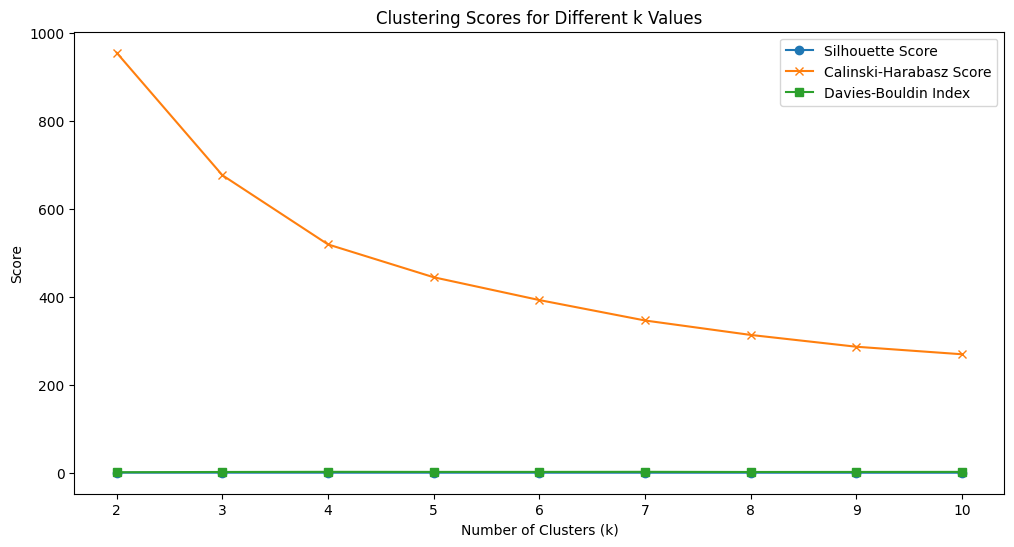

In [53]:
def Clustering_Scores_for_diff_k(X_train):
    # Evaluate clustering for different k values
    k_values = range(2, 11)
    sil_scores = []
    ch_scores = []
    db_scores = []
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)
        labels = kmeans.labels_
        
        sil_scores.append(silhouette_score(X_train, labels))
        ch_scores.append(calinski_harabasz_score(X_train, labels))
        db_scores.append(davies_bouldin_score(X_train, labels))
    
    # Plot the scores
    plt.figure(figsize=(12, 6))
    plt.plot(k_values, sil_scores, marker='o', label='Silhouette Score')
    plt.plot(k_values, ch_scores, marker='x', label='Calinski-Harabasz Score')
    plt.plot(k_values, db_scores, marker='s', label='Davies-Bouldin Index')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Score')
    plt.title('Clustering Scores for Different k Values')
    plt.legend()
    plt.show()

#function calling
Clustering_Scores_for_diff_k(X_train)


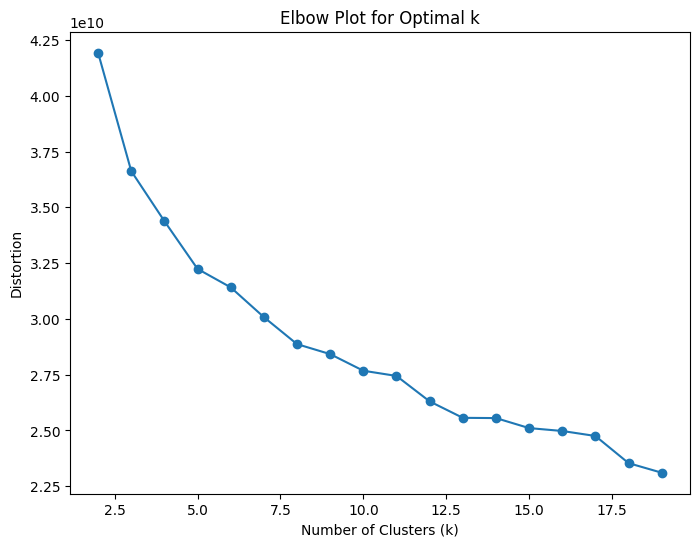

In [54]:
def determine_optimal_k(X_train):
    # Elbow plot to determine optimal k
    distortions = []

    #for different value of k
    for k in range(2, 20):
        kmeans = KMeans(n_clusters=k).fit(X_train)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, 20), distortions, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Plot for Optimal k')
    plt.show()

#calling function
determine_optimal_k(X_train)